In [1]:
from PyPurityTools import PyPurityTools as ppt
from PyPurityFunctions import PyPurityFunctions as ppf
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import savgol_filter
import matplotlib.style
import matplotlib as mpl
import math
import scipy.fftpack
from scipy.signal import butter,filtfilt
import scipy.fftpack
import os
import statistics

In [2]:
path_dir: str = r"/unix/dune/purity/2022October14Vacuum/Gold/"

In [3]:
waveform_ch3 = ppf.single_waveform_check(path_dir,"Field_5.10.20Vcm_FibreIn_",".ch3.traces")

In [4]:
waveform_ch3_time=np.arange(len(waveform_ch3[0]))

In [5]:
waveform_ch4 = ppf.single_waveform_check(path_dir,"Field_5.10.20Vcm_FibreIn_",".ch4.traces")

In [6]:
waveform_ch4_time=np.arange(len(waveform_ch4[0]))

In [7]:
bkg_ch3 = ppf.single_waveform_check(path_dir,"Field_5.10.20Vcm_FibreOut_HVOn",".ch3.traces")

In [8]:
bkg_time=np.arange(len(bkg_ch3[0]))

In [9]:
bkg_ch4 = ppf.single_waveform_check(path_dir,"Field_5.10.20Vcm_FibreOut_HVOn",".ch4.traces")

In [10]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

Text(0.5,1,'A waveform for channel 3 ANODE')

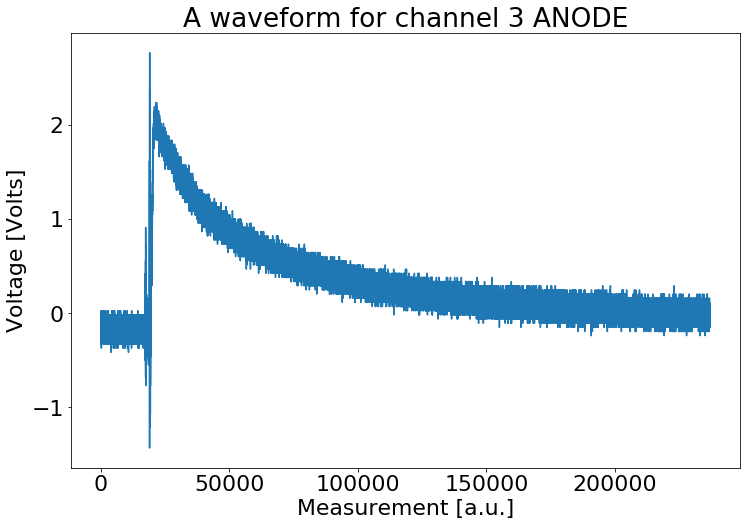

In [11]:
fig, ax = plt.subplots()
ax.plot(waveform_ch3_time,waveform_ch3[0],label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("A waveform for channel 3 ANODE")

Text(0.5,1,'A waveform for channel 4 CATHODE')

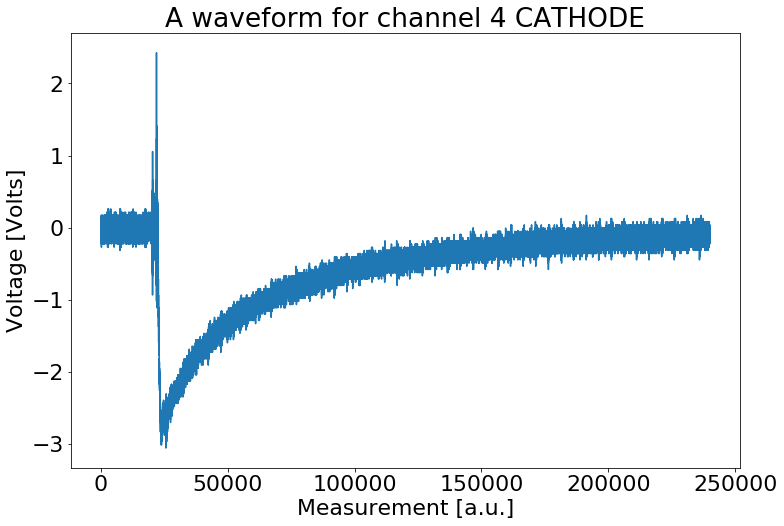

In [12]:
fig, ax = plt.subplots()
ax.plot(waveform_ch4_time,waveform_ch4[0],label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("A waveform for channel 4 CATHODE")

Text(0.5,1,'A background waveform for channel 3')

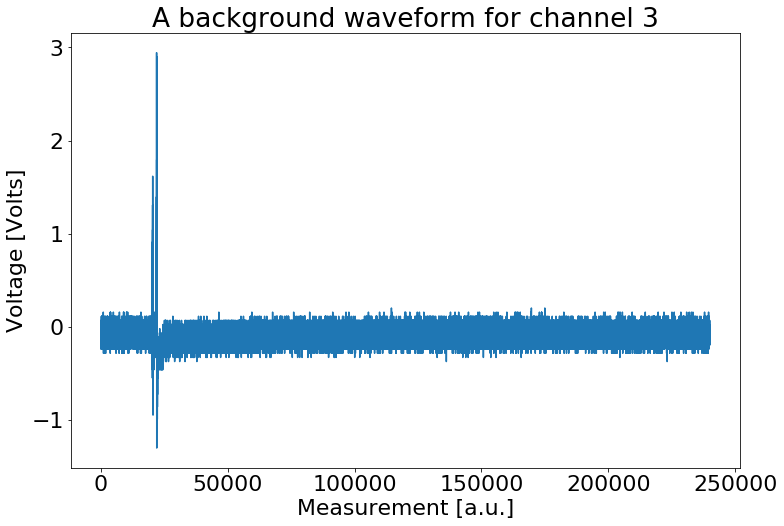

In [13]:
fig, ax = plt.subplots()
ax.plot(bkg_time,bkg_ch3[0],label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("A background waveform for channel 3")

Text(0.5,1,'A background waveform for channel 4')

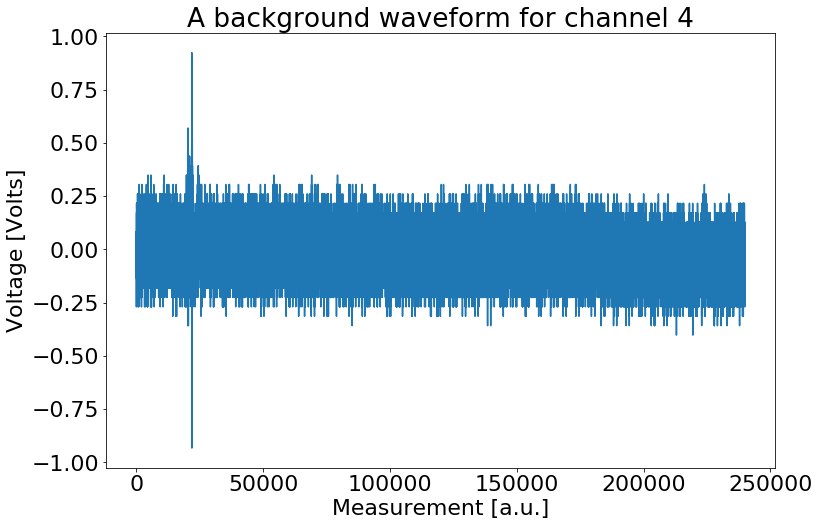

In [27]:
fig, ax = plt.subplots()
ax.plot(bkg_time,bkg_ch4[0],label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("A background waveform for channel 4")

In [28]:
average_ch3=[]

In [29]:
average_ch3=ppf.waveform_averager(waveform_ch3)

In [30]:
average_ch4=[]

In [31]:
average_ch4=ppf.waveform_averager(waveform_ch4)

Text(0.5,1,'An average waveform for channel 3 ANODE')

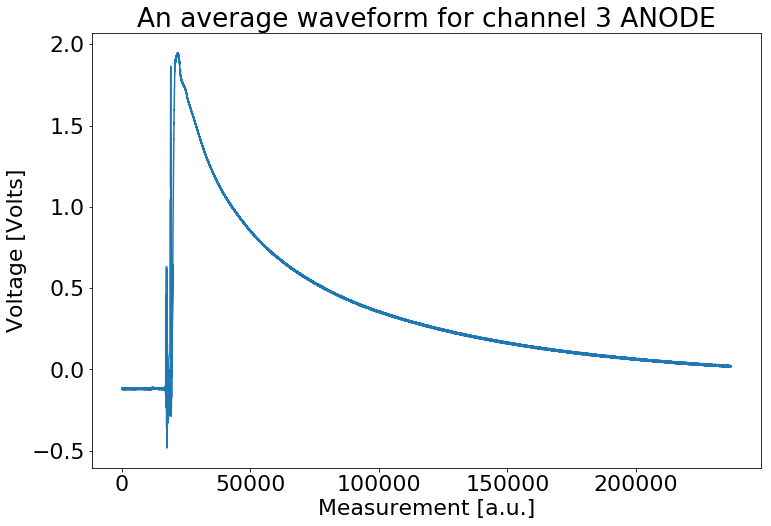

In [32]:
fig, ax = plt.subplots()
ax.plot(waveform_ch3_time,average_ch3,label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 3 ANODE")

Text(0.5,1,'An average waveform for channel 4 CATHODE')

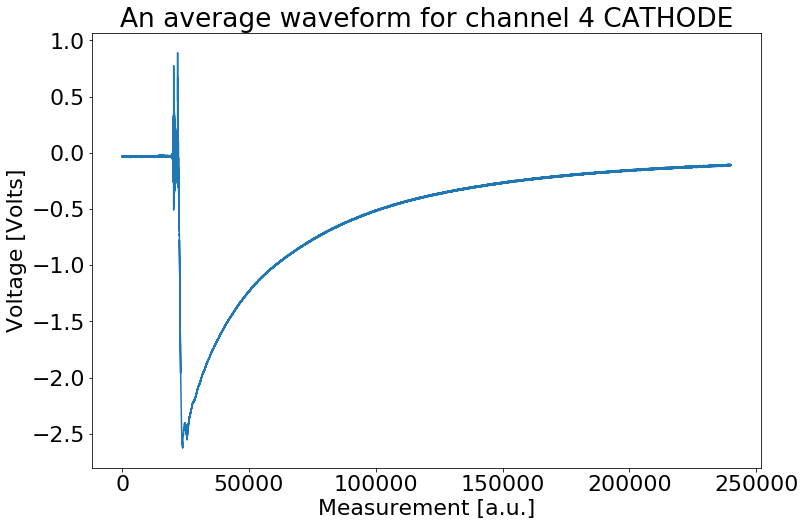

In [33]:
fig, ax = plt.subplots()
ax.plot(waveform_ch4_time,average_ch4,label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 4 CATHODE")

In [34]:
average_bkg_ch3=[]

In [35]:
average_bkg_ch3=ppf.waveform_averager(bkg_ch3)

Text(0.5,1,'An average background waveform for channel 3 ANODE')

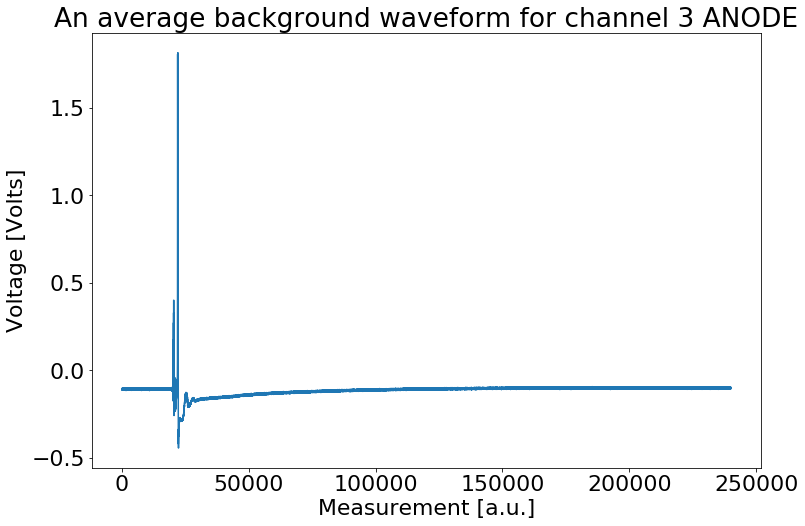

In [36]:
fig, ax = plt.subplots()
ax.plot(bkg_time,average_bkg_ch3,label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average background waveform for channel 3 ANODE")

In [37]:
average_bkg_ch4=[]

In [38]:
average_bkg_ch4=ppf.waveform_averager(bkg_ch4)

Text(0.5,1,'An average background waveform for channel 4 CATHODE')

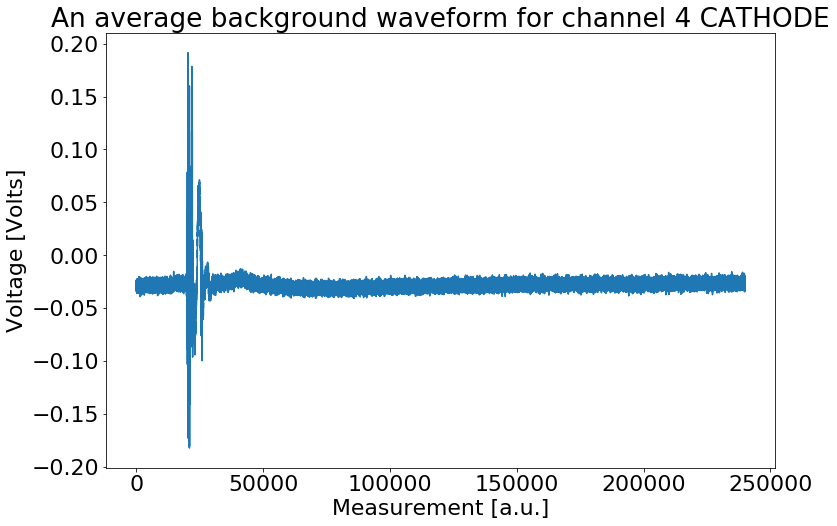

In [40]:
fig, ax = plt.subplots()
ax.plot(bkg_time,average_bkg_ch4,label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average background waveform for channel 4 CATHODE")

In [ ]:
len(average_bkg_ch3)

In [ ]:
ave_clean_ch3=[]
for i in range(len(average_ch3)):
    ave_clean_ch3.append(average_ch3[i]-average_bkg_ch3[i])

In [ ]:
fig, ax = plt.subplots()
ax.plot(waveform_ch3_time,ave_clean_ch3,label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 3 ANODE")

In [ ]:
ave_clean_ch4=[]
for i in range(len(average_ch4)):
    ave_clean_ch4.append(average_ch4[i]-average_bkg_ch4[i])

In [ ]:
fig, ax = plt.subplots()
ax.plot(waveform_ch4_time,ave_clean_ch4,label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel4 CATHODE")

In [ ]:
path_dir_bkg = "/home/svergani/waveform_study_results/2022_12_05/"

In [ ]:
peak_ch3_bkg=ppf.file_collector(path_dir_bkg,"ch3_peaks_")
peak_ch4_bkg=ppf.file_collector(path_dir_bkg,"ch4_peaks_")

In [ ]:
peak_ch3_bkg

In [ ]:
peak_ch4_bkg

In [ ]:
path_dir_output: str = r"/home/svergani/waveform_study_results/2022_10_31/"

In [ ]:
peaks_ch3=ppf.file_collector(path_dir_output,"ch3_peaks_")
peaks_ch4=ppf.file_collector(path_dir_output,"ch4_peaks_")

In [ ]:
ch3_time=np.arange(len(peaks_ch3))
ch4_time=np.arange(len(peaks_ch4))

In [ ]:
fig, ax = plt.subplots()
ax.plot(ch3_time,peaks_ch3,label="Peaks ANODE CH3")
ax.plot(ch4_time,peaks_ch4, label="Peaks CATHODE CH4")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("Peaks measured for channel 3 and 4")
ax.legend(fontsize=30,loc='upper right')

In [ ]:
#remove bakground from peaks
new_peaks_ch3 = []
new_peaks_ch4 = []
for i in range(len(peaks_ch3)):
    new_peaks_ch3.append(peaks_ch3[i]-peak_ch3_bkg)
    new_peaks_ch4.append(peaks_ch4[i]-peak_ch4_bkg)

In [ ]:
fig, ax = plt.subplots()
ax.plot(ch3_time,new_peaks_ch3,label="Peaks ANODE CH3 w/o bkg")
ax.plot(ch4_time,new_peaks_ch4, label="Peaks CATHODE CH4 w/o bkg")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("Peaks measured for channel 3 and 4 w/o bkg noise")
ax.legend(fontsize=30,loc='lower right')

In [ ]:
waveform_ch3[3][0]